In [2]:
import numpy as np

# Comparisons, Masks, and Boolean Logic


## Comparison Operators as ufuncs

In [6]:
A=np.random.randint(40,size=50)
A

array([ 7, 15,  2, 34, 29, 22, 34,  3, 34, 10, 19, 11, 38, 32, 37, 22, 12,
       23, 14,  4, 25, 26, 12, 22, 15, 15, 31, 16, 38,  4,  3, 12, 28,  6,
       19,  4, 30, 33, 21,  5, 29, 27, 25, 35, 14,  2, 11, 26, 39, 35])

In [11]:
print(A<15)
print(A>15)
print(A<=15)
print(A<=15)
print(A!=15)
print(A==15)

[ True False  True False False False False  True False  True False  True
 False False False False  True False  True  True False False  True False
 False False False False False  True  True  True False  True False  True
 False False False  True False False False False  True  True  True False
 False False]
[False False False  True  True  True  True False  True False  True False
  True  True  True  True False  True False False  True  True False  True
 False False  True  True  True False False False  True False  True False
  True  True  True False  True  True  True  True False False False  True
  True  True]
[ True  True  True False False False False  True False  True False  True
 False False False False  True False  True  True False False  True False
  True  True False False False  True  True  True False  True False  True
 False False False  True False False False False  True  True  True False
 False False]
[ True  True  True False False False False  True False  True False  True
 False Fa

In [12]:
(A*2)==(A**2)

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False])

Although the comparison operators are being used as Ufunctions in numpy, internally numpy uses `np.less(A,15)` for `A<15`

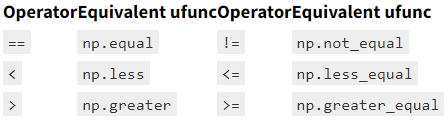

Quite obvious that it would also work with multi-Dimensional Array

In [14]:
A=np.random.randint(100,size=(2,3,4))
A<50

array([[[ True,  True, False, False],
        [ True, False, False, False],
        [False, False,  True, False]],

       [[False,  True,  True, False],
        [ True,  True, False,  True],
        [ True,  True, False,  True]]])

Each of these results is a Boolean Array and Numpy provides some straightforward patterns for working with these Boolean results

## Working with Boolean Arrays

In [15]:
A

array([[[38, 48, 65, 88],
        [ 5, 82, 53, 57],
        [64, 55, 34, 63]],

       [[63, 30, 38, 97],
        [49, 45, 54,  4],
        [ 3, 20, 65, 22]]])

### Counting True Entries

In [16]:
np.count_nonzero(A<50)

12

In [23]:
#OR
print(np.sum(A<50))
print(np.sum(A<50,axis=(0,2)))#By using np.sum() we can specify the axis
print(np.sum(A<75,axis=1))

12
[4 4 4]
[[3 2 3 2]
 [3 3 3 2]]


In [27]:
print(np.any(A>90))#if any value is true
print(np.all(A<90))#If all values are true

True
False


In [28]:
print(np.any(A<60,axis=0))

[[ True  True  True False]
 [ True  True  True  True]
 [ True  True  True  True]]


#### Remember to use the proper numpy version of the `sum` `any` and `all` functions. The built-in python functions do not contain the axis feature 

### Binary Boolean operators

In [45]:
#IMPORTING RAINFALL DATA (PRECODED SCRIPT)
import numpy as np
import pandas as pd
rainfall=pd.read_csv('Seattle2014.csv')['PRCP'].values
inches=rainfall/254.0
inches.shape

(365,)

In [51]:
Between1AndHalfIn=(inches<1)&(inches>0.5)
np.sum(Between1AndHalfIn)

29

Note that the parentheses here are important–because of operator precedence rules, with parentheses removed this expression would be evaluated as follows, which results in an error:



`inches > (0.5 & inches) < 1`

In [54]:
np.sum(~Between1AndHalfIn)
# ~ being the not operator This expression calculates (inches>1) OR (inches<0.5)
#Remember De-Morgan's Law

336

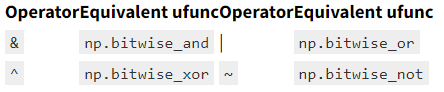

### Boolean Arrays as Masks

In [59]:
A

array([[[38, 48, 65, 88],
        [ 5, 82, 53, 57],
        [64, 55, 34, 63]],

       [[63, 30, 38, 97],
        [49, 45, 54,  4],
        [ 3, 20, 65, 22]]])

In [61]:
A<50

array([[[ True,  True, False, False],
        [ True, False, False, False],
        [False, False,  True, False]],

       [[False,  True,  True, False],
        [ True,  True, False,  True],
        [ True,  True, False,  True]]])

In [63]:
A[A<50]

array([38, 48,  5, 34, 30, 38, 49, 45,  4,  3, 20, 22])

https://jakevdp.github.io/PythonDataScienceHandbook/02.06-boolean-arrays-and-masks.html#:~:text=Aside%3A%20Using%20the%20Keywords%20and/or%20Versus%20the%20Operators%20%26/%7C